In [1]:
import librosa
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
labels = next(os.walk('Data/genres_original/'))[1]
labels

['hiphop',
 'classical',
 'blues',
 'metal',
 'jazz',
 'country',
 'pop',
 'rock',
 'disco',
 'reggae']

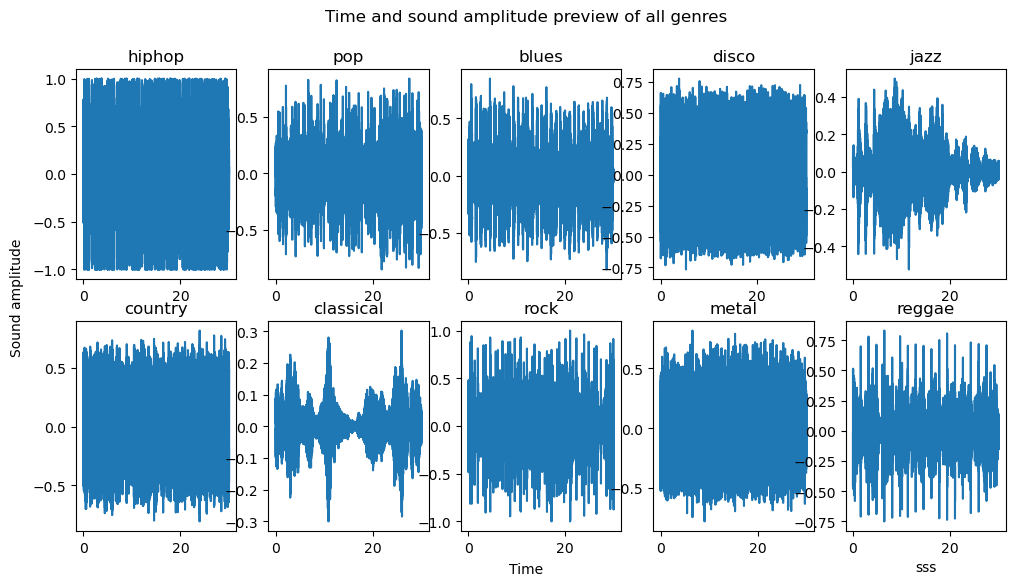

In [22]:
fig,ax = plt.subplots(2, 5, figsize = (12,6)) 
plt.suptitle('Time and sound amplitude preview of all genres')
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.07, 0.5, 'Sound amplitude', va='center', rotation='vertical')
# xlabel: time
# ylabel: sound amplitude
for i, genre in enumerate(labels):
    audio, sfreq = librosa.load(f'Data/genres_original/{genre}/{genre}.00003.wav')
    time = np.arange(0, len(audio))/sfreq
    ax[i%2,i%5].plot(time,audio)
    ax[i%2,i%5].set_title(genre)
plt.xlabel('sss')
plt.show()

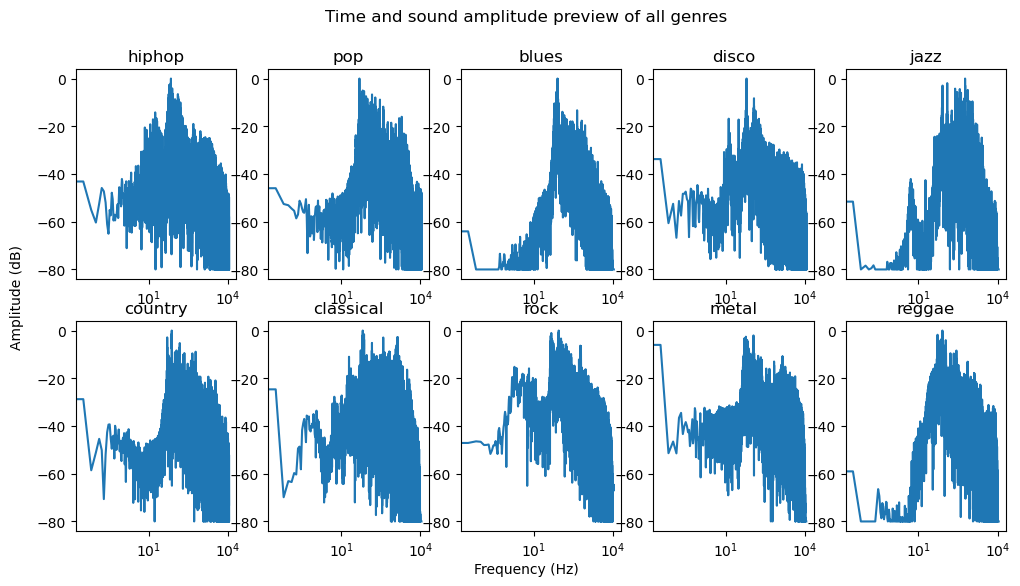

In [32]:
fig,ax = plt.subplots(2, 5, figsize = (12,6)) 
plt.suptitle('Frequency and amplitude preview of all genres')
plt.xscale('log')
fig.text(0.5, 0.04, 'Frequency (Hz)', ha='center')
fig.text(0.07, 0.5, 'Amplitude (dB)', va='center', rotation='vertical')
# xlabel: time
# ylabel: sound amplitude
for i, genre in enumerate(labels):
    audio, sfreq = librosa.load(f'Data/genres_original/{genre}/{genre}.00003.wav')
    
    window = np.hanning(len(audio))
    windowed_input = audio * window
    dft = np.fft.rfft(windowed_input)

    # get the amplitude spectrum in decibels
    amplitude = np.abs(dft)
    amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

    # get the frequency bins
    frequency = librosa.fft_frequencies(sr=sfreq, n_fft=len(audio))
    ax[i%2,i%5].plot(frequency,amplitude_db)
    ax[i%2,i%5].set_title(genre)
    ax[i%2,i%5].set_xscale('log')
plt.show()



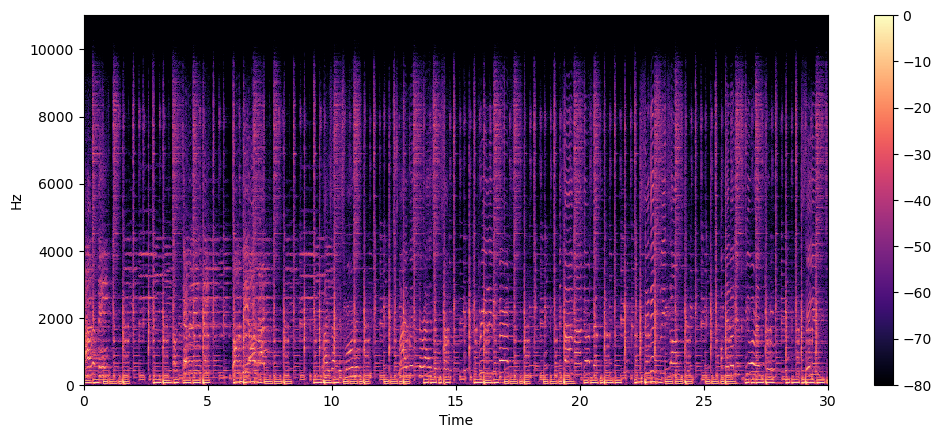

In [33]:
D = librosa.stft(audio)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [5]:
def get_data(input_path, output_path):
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(input_path)):
        print(dirpath)

get_data('Data/genres_original', 'sfsf')

Data/genres_original
Data/genres_original/hiphop
Data/genres_original/classical
Data/genres_original/blues
Data/genres_original/metal
Data/genres_original/jazz
Data/genres_original/country
Data/genres_original/pop
Data/genres_original/rock
Data/genres_original/disco
Data/genres_original/reggae
